# Assignment 4: Implementation of ConvNets (start early on this one!)
-------------------------------------

**Name:Geethasree Madiraju Nagaraju**


**Problem Statement:**
* The problem at hand is binary image classification, aimed at distinguishing between two different types of vehicles: cars and bicycles. This task has numerous real-world applications. Following are few contexts in which this task can be applied on real world.

* In the context of autonomous vehicles, correctly identifying cars and bicycles in images is crucial for safe navigation and object avoidance. The ability to differentiate between these two classes assists self-driving cars in making right decisions contributing to overall road safety.

* Further this model can be used to monitor parking areas to ensure the availability of bicycle racks or car parking spaces. it can also be used to enhance security systems to identify and prevent thefts.

* In transportation and urban planning, accurate car and bicycle detection from images can be leveraged for traffic analysis. It facilitates the monitoring of road infrastructure and aids in decision-making for traffic flow optimization and safety enhancement.

* Overall, binary image classification for car vs. bicycle detection addresses a diverse range of applications with implications for transportation, safety, and convenience in both urban and technological contexts.


We can approach this in two ways. We can gather images of all types of vehicles and pose it as a multiclass classification problem, For now, we can limit it to binary classification problem where our training data is a mix of car and bicycle images and CNN can be used to detect if a car exists in a given image.

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
# !rm -r images

In [4]:
#import libraries
from bing_image_downloader import downloader

In [21]:
from six import BytesIO
from IPython.display import Image, display
from PIL import Image
import numpy as np
import glob
import os
import shutil
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

### Download Images
Download all the necessary images required for our classification problem

In [ ]:
downloader.download("a car", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
downloader.download("a bicycle", limit=200,  output_dir='images', adult_filter_off=True, force_replace=False)

In [ ]:
!ls images/ -alrt

total 36
drwxr-xr-x 1 root root  4096 Oct  7 21:14  ..
drwxr-xr-x 2 root root 12288 Oct  7 21:17 'a car'
drwxr-xr-x 2 root root 12288 Oct  7 21:22 'a bicycle'
drwxr-xr-x 2 root root  4096 Oct  7 21:37  .ipynb_checkpoints
drwxr-xr-x 5 root root  4096 Oct  7 21:40  .


In [ ]:
!ls 'images'/'a car'

Image_100.jpg	Image_137.jpg	Image_173.jpg  Image_28.jpg  Image_64.jpg
Image_101.jpg	Image_138.jpg	Image_174.png  Image_29.png  Image_65.jpg
Image_102.jpg	Image_139.jpg	Image_175.jpg  Image_2.jpeg  Image_66.jpg
Image_103.jpg	Image_13.jpeg	Image_176.jpg  Image_30.jpg  Image_67.jpg
Image_104.jpg	Image_140.jpg	Image_177.jpg  Image_31.jpg  Image_68.jpg
Image_105.jpg	Image_141.jpg	Image_178.jpg  Image_32.jpg  Image_69.png
Image_106.jpg	Image_142.jpg	Image_179.jpg  Image_33.jpg  Image_6.jpg
Image_107.jpg	Image_143.jpg	Image_17.jpg   Image_34.jpg  Image_70.jpg
Image_108.jpg	Image_144.png	Image_180.jpg  Image_35.png  Image_71.jpg
Image_109.png	Image_145.png	Image_181.jpg  Image_36.jpg  Image_72.jpg
Image_10.jpg	Image_146.jpg	Image_182.jpg  Image_37.jpg  Image_73.jpg
Image_110.jpeg	Image_147.jpeg	Image_183.jpg  Image_38.jpg  Image_74.jpg
Image_111.jpg	Image_148.png	Image_184.jpg  Image_39.jpg  Image_75.jpg
Image_112.jpg	Image_149.jpg	Image_185.jpg  Image_3.jpg   Image_76.png
Image_113.jpg	Image_

In [ ]:
!ls 'images'/'a bicycle'

Image_100.jpg  Image_137.JPG   Image_173.jpg   Image_28.jpg  Image_64.jpg
Image_101.jpg  Image_138.jpg   Image_174.JPG   Image_29.jpg  Image_65.jpg
Image_102.jpg  Image_139.jpg   Image_175.jpg   Image_2.jpg   Image_66.jpg
Image_103.jpg  Image_13.jpg    Image_176.jpg   Image_30.jpg  Image_67.jpg
Image_104.jpg  Image_140.jpg   Image_177.png   Image_31.png  Image_68.jpg
Image_105.jpg  Image_141.jpg   Image_178.JPG   Image_32.jpg  Image_69.jpg
Image_106.jpg  Image_142.jpg   Image_179.jpg   Image_33.png  Image_6.png
Image_107.jpg  Image_143.jpg   Image_17.jpg    Image_34.jpg  Image_70.jpg
Image_108.jpg  Image_144.JPG   Image_180.jpg   Image_35.jpg  Image_71.jpg
Image_109.png  Image_145.jpeg  Image_181.jpg   Image_36.jpg  Image_72.jpg
Image_10.png   Image_146.jpg   Image_182.JPG   Image_37.jpg  Image_73.jpg
Image_110.png  Image_147.jpg   Image_183.jpg   Image_38.jpg  Image_74.png
Image_111.png  Image_148.jpg   Image_184.jpg   Image_39.jpg  Image_75.jpg
Image_112.jpg  Image_149.jpg   Image_18

## Visualize any image

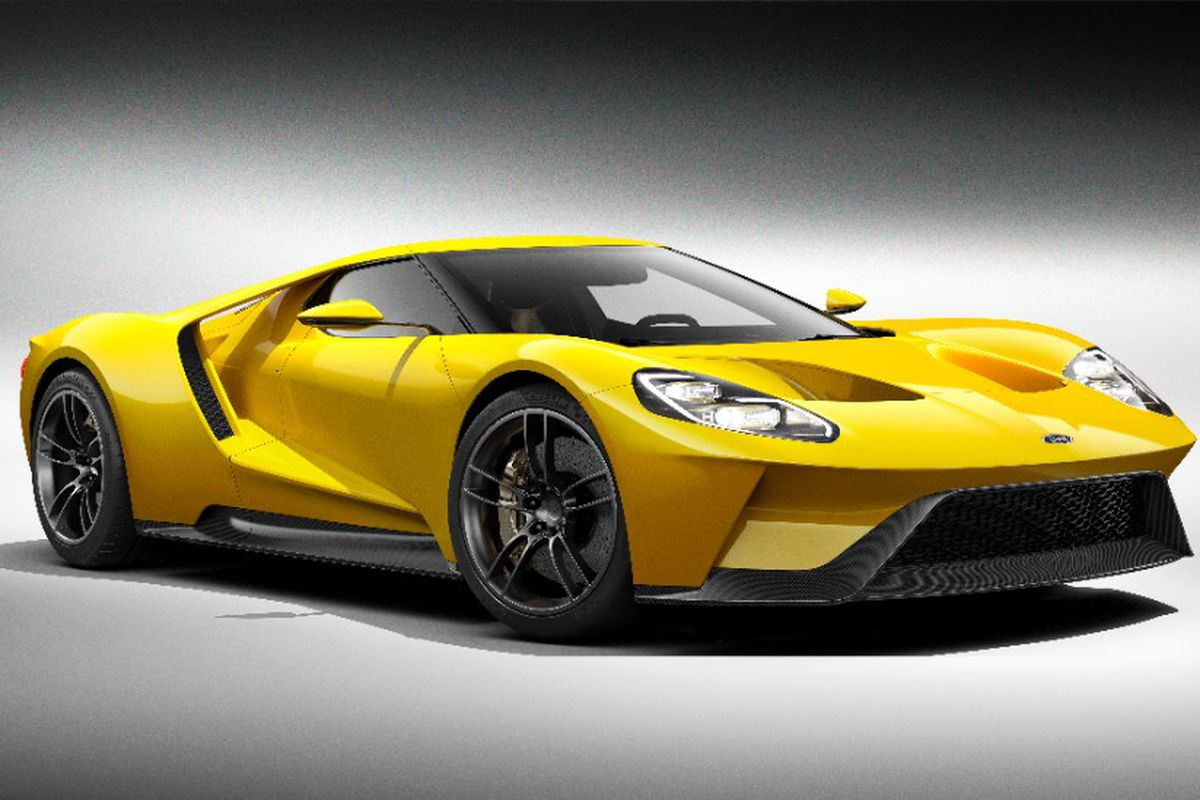

In [8]:
base_dir = 'images/'
car_dir = os.path.join(base_dir , 'a car/')
bicycle_dir = os.path.join(base_dir, 'a bicycle/')
car_1 = os.path.join(car_dir,"Image_1.jpg")
display(Image.open(car_1))

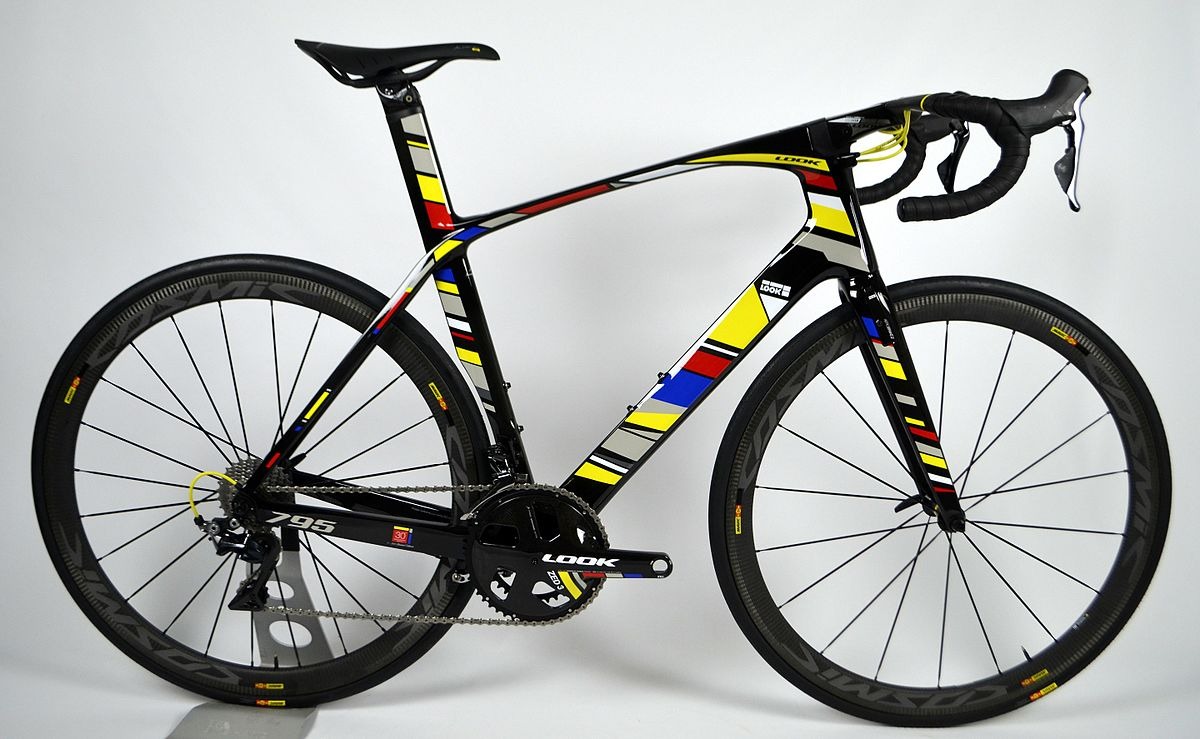

In [ ]:
bicycle_1 = os.path.join(bicycle_dir,"Image_1.jpg")
display(Image.open(bicycle_1))

In [ ]:
# img_data = open("images/a car/Image_147.jpeg", 'rb').read()
# image = Image.open(BytesIO(img_data))
# print(image.mode)
# if image.mode != 'RGBA':
#     image = image.convert('RGB')  # Convert RGBA images to RGB
# # (im_width, im_height) = image.size

CMYK


Now that we have downloaded all the images required for our classification problem, we read all the car and bicycle images from folders and arrange them into necessary folder structure so that Image generator can load images as well as their corresponding target labels. For this problem, our target variable is 1, if a car is present in an image. Hence, for all the bicycle images, target variable is 0.

In [9]:
# function convert image into a numpy array
def load_image_into_numpy_array(path):
  img_data = open(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  if image.mode != 'RGB': # sometimes if the downloaded image is png, it might have additional alpha channel, convert it to RGB in such cases
    image = image.convert('RGB')  # Convert other format images to RGB
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [10]:
# get all the car images into a single list
# This list can be later used to store each image into train/test folders
car_dir_path = car_dir + "/*"
car_images_np = []
for iname in glob.glob(car_dir_path):
  try:
    car_images_np.append(load_image_into_numpy_array(iname))
  except:
    print(iname)
    print('An error occured for an image')

In [11]:
# get all the bicycle images into a single array
# This list can be later used to store each image into train/test folders
bicycle_dir_path = bicycle_dir + "/*"
bicycle_images_np = []
for iname in glob.glob(bicycle_dir_path):
  try:
    bicycle_images_np.append(load_image_into_numpy_array(iname))
  except:
    print(iname)
    print('An error occured for an image')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
# make train and test dirs
os.mkdir(os.path.join(base_dir, "train"))
os.mkdir(os.path.join(base_dir, "test"))

#get train and test directories paths
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [13]:
#create new directories for each class
#Since this is a binary classification, we are creating two classes 0, 1
os.mkdir(''.join((train_dir,'/',str(0))))
os.mkdir(''.join((train_dir,'/',str(1))))

#create the similar folder structure in test directories
os.mkdir(''.join((test_dir,'/',str(0))))
os.mkdir(''.join((test_dir,'/',str(1))))

In [14]:
# Moving 30% of the car images to test set and rest 70% to train
test_size_car = int(len(car_images_np)*0.3)

# move all the car images to train and test folders
for i in range(len(car_images_np)):
  im = Image.fromarray(car_images_np[i])
  if i < test_size_car:
    #move to test folder
    dst_path = ''.join((test_dir,'/',str(1), '/', str(i),'.jpg'))
  else:
    #move to train folder
    dst_path = ''.join((train_dir,'/',str(1), '/', str(i),'.jpg'))
  im.save(dst_path)


In [15]:
# Moving 30% of the bicycle images to test set and rest 70% to train
test_size_bicycle = int(len(bicycle_images_np)*0.3)

# move all the bicycle images to train and test folders
for i in range(len(bicycle_images_np)):
  im = Image.fromarray(bicycle_images_np[i])
  if i < test_size_bicycle:
    #move to test folder
    dst_path = ''.join((test_dir,'/',str(0), '/', str(i),'.jpg'))
  else:
    #move to train folder
    dst_path = ''.join((train_dir,'/',str(0), '/', str(i),'.jpg'))
  im.save(dst_path)

In [90]:
# import necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


import time

### Load Data using Generators

In [117]:
# instantiate imagedata generator that can rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20

# use the generator to load the data from train folder
train_generator = train_datagen.flow_from_directory(
        train_dir,
        # resizing all the images to 50x50
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='binary')

# use the generator to load the data from test folder
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='binary')

Found 280 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [118]:
test_data_size = test_generator.samples
train_data_size = train_generator.samples
print(train_data_size)
print(test_data_size)

280
120


### Build the Model

In [119]:
# create the model architecture
# adding two conv and two pooling layers followed by a dense layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #using sigmoid as this is binary classification problem
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 11, 11, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1936)              0         
                                                                 
 dense_30 (Dense)            (None, 256)             

### Compile the model

In [120]:
#using binary_crossentropy as this is binary classification problem
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## Fit the model

In [121]:
start = time.time()

history = model.fit(
      train_generator,
      steps_per_epoch=int(train_data_size/batch_size),
      epochs=15,
      validation_data=test_generator,
      validation_steps=int(test_data_size/batch_size))

end = time.time()
print(end - start)

Epoch 1/15
14/14 [==============================] - 6s 398ms/step - loss: 0.6234 - accuracy: 0.6357 - val_loss: 0.6726 - val_accuracy: 0.6833
Epoch 2/15
14/14 [==============================] - 6s 474ms/step - loss: 0.5088 - accuracy: 0.7714 - val_loss: 0.5664 - val_accuracy: 0.7000
Epoch 3/15
14/14 [==============================] - 6s 435ms/step - loss: 0.4115 - accuracy: 0.8536 - val_loss: 0.5211 - val_accuracy: 0.7667
Epoch 4/15
14/14 [==============================] - 8s 541ms/step - loss: 0.3066 - accuracy: 0.8964 - val_loss: 0.4576 - val_accuracy: 0.7917
Epoch 5/15
14/14 [==============================] - 5s 365ms/step - loss: 0.2443 - accuracy: 0.9214 - val_loss: 0.4733 - val_accuracy: 0.7750
Epoch 6/15
14/14 [==============================] - 9s 639ms/step - loss: 0.1761 - accuracy: 0.9429 - val_loss: 0.4715 - val_accuracy: 0.8083
Epoch 7/15
14/14 [==============================] - 6s 433ms/step - loss: 0.1100 - accuracy: 0.9679 - val_loss: 0.5254 - val_accuracy: 0.8333
Epoch 

### Model Evaluation

#### Learning Curve for Loss

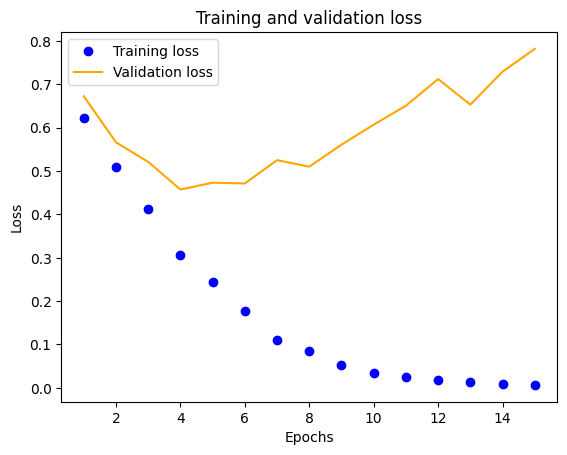

In [122]:
#learning curve for train and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Learning Curve for accuracy

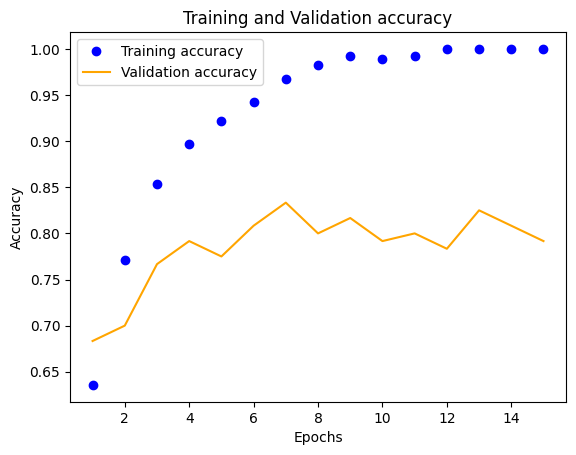

In [123]:
#learning curve for train and validation accuracy
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Save

In [124]:
#saving the model for reuse instead of training multiple times
model.save('/content/cars_and_bicycles_v1.h5', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load the saved model

In [125]:
#loading the saved model
loaded_model = models.load_model('/content/cars_and_bicycles_v1.h5')

### Model Predictions

In [126]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [128]:
# saving model predictions in a dataframe
predictions = pd.DataFrame(columns=['actual','pred'])
batches = 0
#use model to predict for each batch
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = loaded_model.predict(x_val)
  y_pred = flatten(y_pred)
  temp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  predictions = predictions.append(temp)
  if batches >= batch_size:
    #break the loop after we have predictions for all the batches
    break

1/1 [==============================] - 0s 424ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 66ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 119ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 107ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 89ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 55ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 49ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 33ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 31ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 30ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 37ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 32ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 30ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 32ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 32ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 33ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 34ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 36ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 40ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 35ms/step


<ipython-input-128-7b831cd83d71>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


### Classification Report

In [129]:
# print evaluation metrics based on model predictions
print(classification_report(y_true=predictions['actual'],
                            y_pred=np.round(predictions['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       201
         1.0       0.82      0.74      0.78       199

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



## Using Image Augmentation

In [170]:
#Instantiate image generator with image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.1,
    zoom_range=0.3, #not choosing to zoom for now
    horizontal_flip=True)

#no need of augmentation on the test dataset
test_datagen = ImageDataGenerator(rescale=1./255,)

batch_size = 20

# use the generator to load the data from train folder
train_generator = train_datagen.flow_from_directory(
        train_dir,
        # resizing all the images to 50x50
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='binary')

# use the generator to load the data from test folder
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='binary')

Found 280 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [171]:
# create the model architecture
# adding two conv and two pooling layers followed by a dense layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #using sigmoid as this is binary classification problem
model.summary()

#using binary_crossentropy as this is binary classification problem
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 22, 22, 16)        4624      
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 11, 11, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 1936)              0         
                                                                 
 dense_44 (Dense)            (None, 256)             

In [172]:
history = model.fit(
      train_generator,
      steps_per_epoch=int(train_data_size/batch_size),
      epochs=30,
      validation_data=test_generator,
      validation_steps=int(test_data_size/batch_size))

Epoch 1/30
14/14 [==============================] - 7s 424ms/step - loss: 0.6804 - accuracy: 0.5929 - val_loss: 0.6532 - val_accuracy: 0.6500
Epoch 2/30
14/14 [==============================] - 6s 455ms/step - loss: 0.6420 - accuracy: 0.6607 - val_loss: 0.7606 - val_accuracy: 0.6167
Epoch 3/30
14/14 [==============================] - 7s 535ms/step - loss: 0.5848 - accuracy: 0.7143 - val_loss: 0.6245 - val_accuracy: 0.7167
Epoch 4/30
14/14 [==============================] - 9s 693ms/step - loss: 0.5645 - accuracy: 0.7321 - val_loss: 0.7546 - val_accuracy: 0.5500
Epoch 5/30
14/14 [==============================] - 8s 562ms/step - loss: 0.5501 - accuracy: 0.7393 - val_loss: 0.7061 - val_accuracy: 0.6500
Epoch 6/30
14/14 [==============================] - 9s 623ms/step - loss: 0.5663 - accuracy: 0.7429 - val_loss: 0.6283 - val_accuracy: 0.7250
Epoch 7/30
14/14 [==============================] - 8s 600ms/step - loss: 0.5472 - accuracy: 0.7500 - val_loss: 0.5825 - val_accuracy: 0.7167
Epoch 

### Learning curve for loss (with image augmentation)

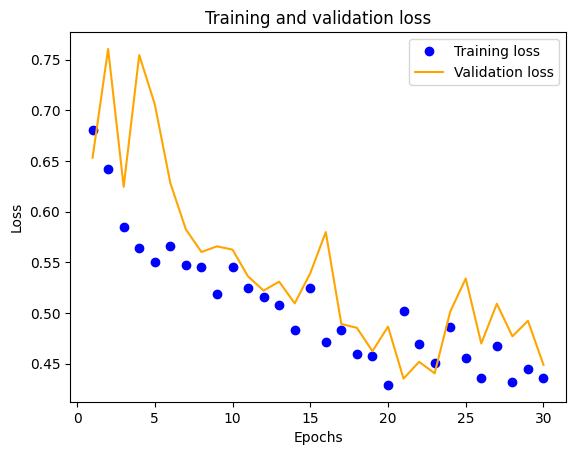

In [173]:
#learning curve for train and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Learning Curve for accuracy(with image augmentation)

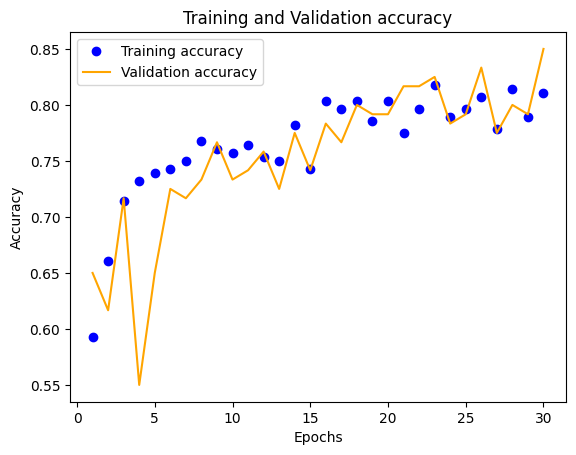

In [174]:
#learning curve for train and validation accuracy
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'orange', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Predictions

In [175]:
def flatten(l):
    return [item for sublist in l for item in sublist]

# saving model predictions in a dataframe
predictions = pd.DataFrame(columns=['actual','pred'])
batches = 0
#use model to predict for each batch
for x_val, y_val in test_generator:
  batches=batches+1
  y_pred = loaded_model.predict(x_val)
  y_pred = flatten(y_pred)
  temp = pd.DataFrame({'actual': y_val, 'pred': y_pred})
  predictions = predictions.append(temp)
  if batches >= batch_size:
    #break the loop after we have predictions for all the batches
    break

1/1 [==============================] - 0s 63ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 55ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 66ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 58ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 34ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 44ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 32ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 35ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 34ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 33ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 41ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 35ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 31ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 39ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 40ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 37ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 38ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 35ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 32ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


1/1 [==============================] - 0s 31ms/step


<ipython-input-175-1ac7316ac8db>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions = predictions.append(temp)


## Evaluating Model Trained on Augmented Images

In [176]:
# print evaluation metrics based on model predictions
print(classification_report(y_true=predictions['actual'],
                            y_pred=np.round(predictions['pred'],0)))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       201
         1.0       0.82      0.74      0.78       199

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



## Observations:
* Bing downloader is extremely helpful, especially when we have a problem statement idea in mind but we do not have open source datasets available to solve such a problem. However, when I looked at the images gathered, there were few images that showed animated cars, few that showed car from inside. Using a different search query like 'a real car' also led to some set of anamolous images. Probably the search query that we are using matters the most to get appropriate data suitable to the problem.
* **Handling Image Formats:** In real world, images can be of different formats. Its necessary to be able to generate a robust code that can read all kinds of image formats and convert it to a common structure that can be used for modelling. I have seen few PNG images that have an extra alpha channel along with RGB(RGBA). Hence, I had to convert all type of image formats into RGB, so that it can be converted into a 3D tensor that our model can feed on.
* **Overfit model without Augmentation:** For the model without Augmentation, CNN severly overfits. It is expected as the training data is too small, hence model will start memorizing instead of learning and fails to generalize well on test data. Increasing Training epochs will just make the model overfit more. Hence using techniques like image augmentation can avoid model to memorize and also increases the size of the training data.
* **Parameters for Image Augmentation:** The choice of parameters that can be chosen for Augmentation depends on the data that we have. I have reviewed couple of car images and observed that most of them are already have zoomed in cars. Hence I decided to zoom out by a large factor so that the model can identify even small cars from a picture.
* **Performance Comparison(Augmented data vs non augmented):** For the model trained on Augmented dataset, it can be observed that the model didnt overfit and there is a scope to run for more epochs to increase model performance. Also, the performance in terms of validation accuracy anf f1 score is higher than that of the model trained on non augmented data.